In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [4]:
# Update hurricane name to see different storm tracks
hurricane = 'IAN_2022'
best_track_df = pd.read_csv(f'data/storms/{hurricane}/hurricane/besttrack.csv', parse_dates=['Timestamp'])

/opt/anaconda3/envs/category-v/lib/python3.14/site-packages/cartopy/mpl/geoaxes.py:1677: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  result = super().scatter(*args, **kwargs)


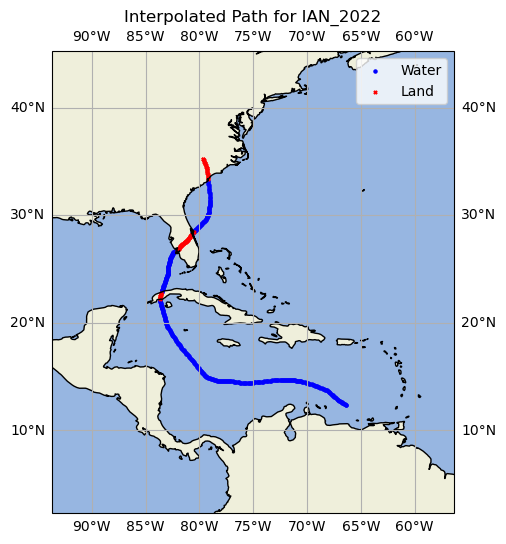

In [5]:
# Get interpolated lat long points
interp_lat = best_track_df['Latitude'].values
interp_lon = best_track_df['Longitude'].values
interp_land = best_track_df['Land'].values

# Create figure
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

min_lat = min(interp_lat) - 10
max_lat = max(interp_lat) + 10
min_lon = min(interp_lon) - 10
max_lon = max(interp_lon) + 10

# Add background geography
ax.set_extent([min_lon, max_lon, min_lat, max_lat], crs=ccrs.PlateCarree()) # set lat long bounds
ax.coastlines() # add coastlines
ax.add_feature(cfeature.LAND) # add land color
ax.add_feature(cfeature.OCEAN) # add ocean color
ax.gridlines(draw_labels=True)
ax.set_title(f"Interpolated Path for {hurricane}")

# Separate land vs water points
land_mask = best_track_df["Land"] == "Y"

land_lats = best_track_df.loc[land_mask, "Latitude"]
land_lons = best_track_df.loc[land_mask, "Longitude"]

water_lats = best_track_df.loc[~land_mask, "Latitude"]
water_lons = best_track_df.loc[~land_mask, "Longitude"]

# Plot water points
ax.scatter(
    water_lons,
    water_lats,
    s=5,
    color='blue',
    marker='o',
    #edgecolor='black',
    transform=ccrs.PlateCarree(),
    label="Water"
)

# Plot land points
ax.scatter(
    land_lons,
    land_lats,
    s=5,
    color='red',
    marker='x',
    edgecolor='black',
    transform=ccrs.PlateCarree(),
    label="Land"
)

ax.legend()

plt.show()